In [1]:
import cv2
import matplotlib.pyplot as plt
from glob import glob
import os
import pandas as pd
import numpy as  np

In [2]:
scan = cv2.imread(r"C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_2022\498_ComputerVision\Project\data\archive\Montgomery\MontgomerySet\CXR_png\MCUCXR_0040_0.png")

In [3]:
left_mask = r"C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_2022\498_ComputerVision\Project\data\archive\Montgomery\MontgomerySet\ManualMask\leftMask\MCUCXR_0040_0.png"
right_mask = r"C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_2022\498_ComputerVision\Project\data\archive\Montgomery\MontgomerySet\ManualMask\rightMask\MCUCXR_0040_0.png" 

In [4]:
left = cv2.imread(left_mask)
right = cv2.imread(right_mask)

Text(0.5, 1.0, 'Right')

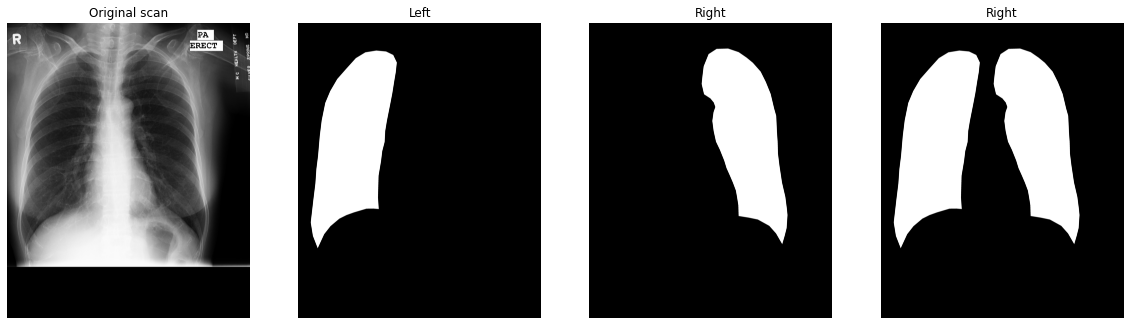

In [5]:
fig = plt.figure(figsize=(20, 10))

rows = 1
columns = 4
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(scan)
plt.axis('off')
plt.title("Original scan")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(left)
plt.axis('off')
plt.title("Left")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(right)
plt.axis('off')
plt.title("Right")


fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(left+right)
plt.axis('off')
plt.title("Right")
  

In [6]:
base_dir = r"C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_2022\498_ComputerVision\Project\data\archive"
mont_paths = glob(os.path.join(base_dir, 'Montgomery', 'MontgomerySet', '*', '*.*'))

In [7]:
all_paths_df = pd.DataFrame(dict(path = mont_paths))

In [8]:
all_paths_df['source'] = all_paths_df['path'].map(lambda x: x.split('\\')[3])
all_paths_df['file_id'] = all_paths_df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
all_paths_df['patient_group']  = all_paths_df['file_id'].map(lambda x: x.split('_')[0])

all_paths_df['file_ext'] = all_paths_df['path'].map(lambda x: os.path.splitext(x)[1][1:])
all_paths_df = all_paths_df[all_paths_df.file_ext.isin(['png', 'txt'])]
all_paths_df['pulm_state']  = all_paths_df['file_id'].map(lambda x: int(x.split('_')[-1]))
all_paths_df.sample(5)

,path,source,file_id,patient_group,file_ext,pulm_state
97,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...,Desktop,MCUCXR_0195_1,MCUCXR,txt,1
234,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...,Desktop,MCUCXR_0194_1,MCUCXR,png,1
89,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...,Desktop,MCUCXR_0150_1,MCUCXR,txt,1
43,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...,Desktop,MCUCXR_0058_0,MCUCXR,txt,0
204,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...,Desktop,MCUCXR_0087_0,MCUCXR,png,0


In [9]:
clean_patients_df = all_paths_df.pivot_table(index = ['patient_group', 'pulm_state', 'file_id'], 
                                             columns=['file_ext'], 
                                             values = 'path', aggfunc='first').reset_index()
clean_patients_df.sample(5)
from warnings import warn
def report_to_dict(in_path):
    with open(in_path, 'r') as f:
        all_lines = [x.strip() for x in f.read().split('\n')]
    info_dict = {}
    try:
        if "Patient's Sex" in all_lines[0]:
            info_dict['age'] = all_lines[1].split(':')[-1].strip().replace('Y', '')
            info_dict['sex'] = all_lines[0].split(':')[-1].strip()
            info_dict['report'] = ' '.join(all_lines[2:]).strip()
        else:
            info_dict['age'] = all_lines[0].split(' ')[-1].replace('yrs', '').replace('yr', '')
            info_dict['sex'] = all_lines[0].split(' ')[0].strip()
            info_dict['report'] = ' '.join(all_lines[1:]).strip()
        
        info_dict['sex'] = info_dict['sex'].upper().replace('FEMALE', 'F').replace('MALE', 'M').replace('FEMAL', 'F')[0:1]
        if 'month' in info_dict.get('age', ''):
            info_dict.pop('age') # invalid
        if 'day' in info_dict.get('age', ''):
            info_dict.pop('age') # invalid
        elif len(info_dict.get('age',''))>0:
            info_dict['age'] = float(info_dict['age'])
        else:
            info_dict.pop('age')
        return info_dict
    except Exception as e:
        print(all_lines)
        warn(str(e), RuntimeWarning)
        return {}
report_df = pd.DataFrame([dict(**report_to_dict(c_row.pop('txt')), **c_row) 
              for  _, c_row in clean_patients_df.iterrows()])
report_df.sample(5)

,age,sex,report,patient_group,pulm_state,file_id,png
86,27.0,M,"LUL infiltrate, ? small areas of cavitation, I...",MCUCXR,1,MCUCXR_0141_1,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...
63,43.0,F,normal,MCUCXR,0,MCUCXR_0084_0,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...
102,67.0,M,improving infiltrate in LUL,MCUCXR,1,MCUCXR_0223_1,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...
109,88.0,F,active PTB with compicating CHF condition,MCUCXR,1,MCUCXR_0258_1,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...
128,61.0,M,rt pleural effusion with some nodular infiltra...,MCUCXR,1,MCUCXR_0362_1,C:\Users\USER\Desktop\Lehigh_MS\Sem_1_Fall_202...


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'pulm_state'}>]], dtype=object)

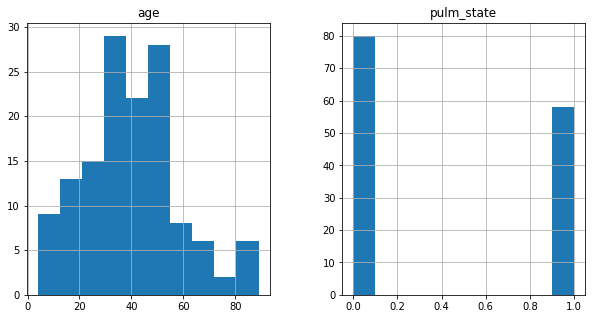

In [10]:
report_df[['age', 'patient_group', 'pulm_state', 'sex']].hist(figsize = (10, 5))

# Laplacian Guassian

In [11]:
from scipy import ndimage

xray_image_laplace_gaussian = ndimage.gaussian_laplace(scan, sigma=1)

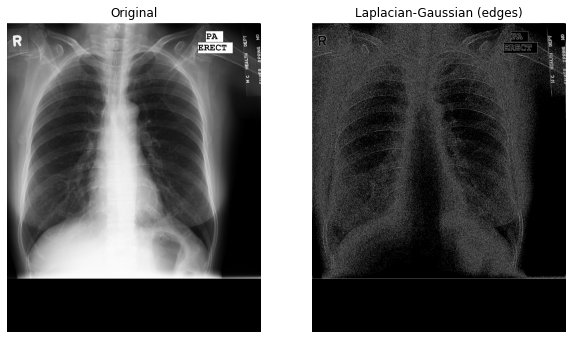

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))

axes[0].set_title("Original")
axes[0].imshow(scan, cmap="gray")
axes[1].set_title("Laplacian-Gaussian (edges)")
axes[1].imshow(xray_image_laplace_gaussian, cmap="gray")
for i in axes:
    i.axis("off")
plt.show()

In [14]:
x_sobel = ndimage.sobel(scan, axis=0)
y_sobel = ndimage.sobel(scan, axis=1)

xray_image_sobel = np.hypot(x_sobel, y_sobel)

xray_image_sobel *= 255.0 / np.max(xray_image_sobel)

In [15]:
xray_image_sobel = xray_image_sobel.astype("float32")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


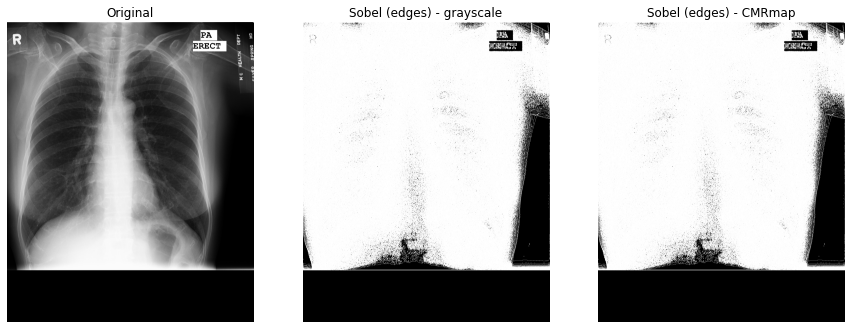

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

axes[0].set_title("Original")
axes[0].imshow(scan, cmap="gray")
axes[1].set_title("Sobel (edges) - grayscale")
axes[1].imshow(xray_image_sobel, cmap="gray")
axes[2].set_title("Sobel (edges) - CMRmap")
axes[2].imshow(xray_image_sobel, cmap="CMRmap")
for i in axes:
    i.axis("off")
plt.show()

In [17]:
fourier_gaussian = ndimage.fourier_gaussian(scan, sigma=0.05)

x_prewitt = ndimage.prewitt(fourier_gaussian, axis=0)
y_prewitt = ndimage.prewitt(fourier_gaussian, axis=1)

xray_image_canny = np.hypot(x_prewitt, y_prewitt)

xray_image_canny *= 255.0 / np.max(xray_image_canny)

print("The data type - ", xray_image_canny.dtype)

The data type -  float64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


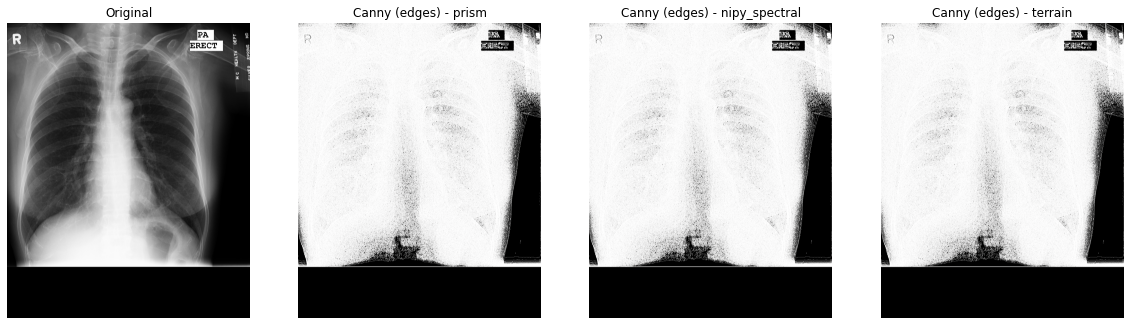

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 15))

axes[0].set_title("Original")
axes[0].imshow(scan, cmap="gray")
axes[1].set_title("Canny (edges) - prism")
axes[1].imshow(xray_image_canny, cmap="prism")
axes[2].set_title("Canny (edges) - nipy_spectral")
axes[2].imshow(xray_image_canny, cmap="nipy_spectral")
axes[3].set_title("Canny (edges) - terrain")
axes[3].imshow(xray_image_canny, cmap="terrain")
for i in axes:
    i.axis("off")
plt.show()

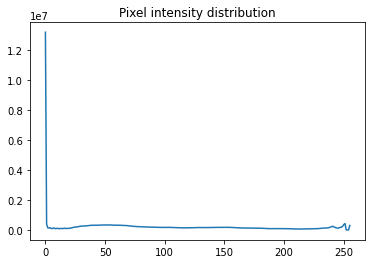

In [19]:
pixel_intensity_distribution = ndimage.histogram(
    scan, min=np.min(scan), max=np.max(scan), bins=256
)

plt.plot(pixel_intensity_distribution)
plt.title("Pixel intensity distribution")
plt.show()

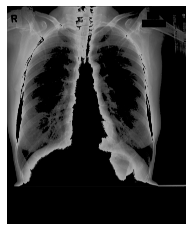

In [20]:
filter_scan = (scan > 50) & (scan < 180)
xray_image_mask_noisy = np.where(filter_scan, scan, 0)
plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()

In [24]:
import skimage.io
import skimage.color
import skimage.filters

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\skimage\io\manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [42]:
# perform automatic thresholding
t = skimage.filters.threshold_otsu(blurred_image)
print("Found automatic threshold t = {}.".format(t))

<ipython-input-42-e8ecaefe63bb>:2: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (4892, 4020, 3) looks like that of an RGB image.
  t = skimage.filters.threshold_otsu(blurred_image)


Found automatic threshold t = 107.


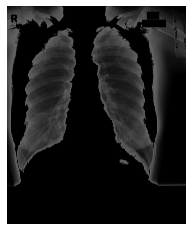

In [54]:
filter_scan = (scan < t)
xray_image_mask_noisy = np.where(filter_scan, scan, 0)
plt.imshow(xray_image_mask_noisy, cmap="gray")
plt.axis("off")
plt.show()